In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial
import numpy as np
from main import calcola
import seaborn as sns

In [118]:
def calcola(numero_dadi: int, totale_dadi: int, perudo: bool = False) -> float:
    """
    C = n! / [ k!(n-k)!]

    n = totale_dadi
    k = numero di dadi uguali
    from math import comb

    def calcola(numero_dadi: int, totale_dadi: int, perudo: bool = False) -> float:
        p = 2/6 if perudo else 1/6
        return comb(totale_dadi, numero_dadi) * p**numero_dadi * (1-p)**(totale_dadi-numero_dadi)

    """
    p = 1 / 6

    if perudo == True:
        p = 2 / 6

    neg_p = 1 - p

    n_fact = factorial(totale_dadi)

    k_fact = factorial(numero_dadi)

    C = n_fact / (k_fact * factorial(totale_dadi - numero_dadi))

    P = C * p**numero_dadi * neg_p ** (totale_dadi - numero_dadi)

    return P

In [119]:
# Create a DataFrame of probabilities P(X = n)
# where:
# m = total dice (1 to 19)
# n = number of equal dice (1 to 19)
# p = 1/6 (single specific face)

import pandas as pd
from math import comb


def binomial_probability_at_least(n, m, p=1 / 6):
    if n > m:
        return 0
    # Complemento: P(X >= n) = 1 - P(X <= n-1)
    prob = sum(comb(m, k) * (p**k) * ((1 - p) ** (m - k)) for k in range(n))
    return 1 - prob


m_values = range(1, 21)
n_values = range(1, 21)

data = {}

for n in n_values:
    data[f"n={n}"] = [binomial_probability_at_least(n, m) for m in m_values]

df = pd.DataFrame(data, index=[f"tot={m}" for m in m_values])

df

,n=1,n=2,n=3,n=4,n=5,n=6,n=7,n=8,n=9,n=10,n=11,n=12,n=13,n=14,n=15,n=16,n=17,n=18,n=19,n=20
tot=1,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
tot=2,0.305556,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
tot=3,0.421296,0.074074,0.004630,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
tot=4,0.517747,0.131944,0.016204,0.000772,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
tot=5,0.598122,0.196245,0.035494,0.003344,0.000129,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
tot=6,0.665102,0.263224,0.062286,0.008702,0.000664,0.000021,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
tot=7,0.720918,0.330204,0.095775,0.017633,0.002004,0.000129,0.000004,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
tot=8,0.767432,0.395323,0.134847,0.030656,0.004609,0.000441,0.000024,5.953742e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
tot=9,0.806193,0.457341,0.178260,0.048021,0.008950,0.001136,0.000094,4.564535e-06,9.922903e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
tot=10,0.838494,0.515483,0.224773,0.069728,0.015462,0.002438,0.000268,1.944889e-05,8.434468e-07,1.653817e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


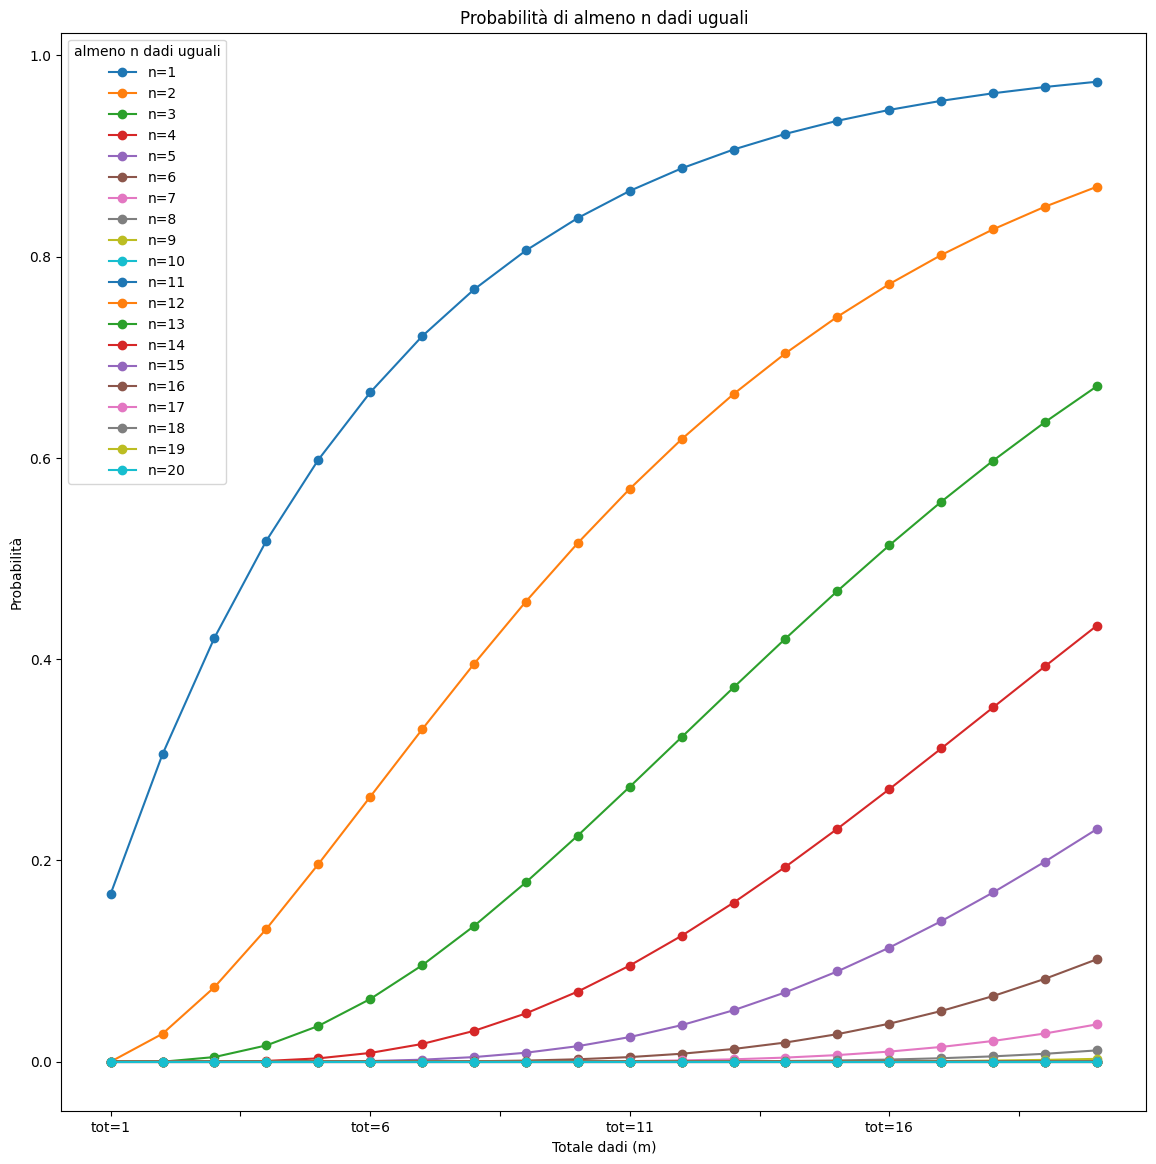

In [120]:
df.plot(figsize=(14, 14), marker="o")
plt.title("Probabilità di almeno n dadi uguali")
plt.xlabel("Totale dadi (m)")
plt.ylabel("Probabilità")
plt.legend(title="almeno n dadi uguali")
plt.show()

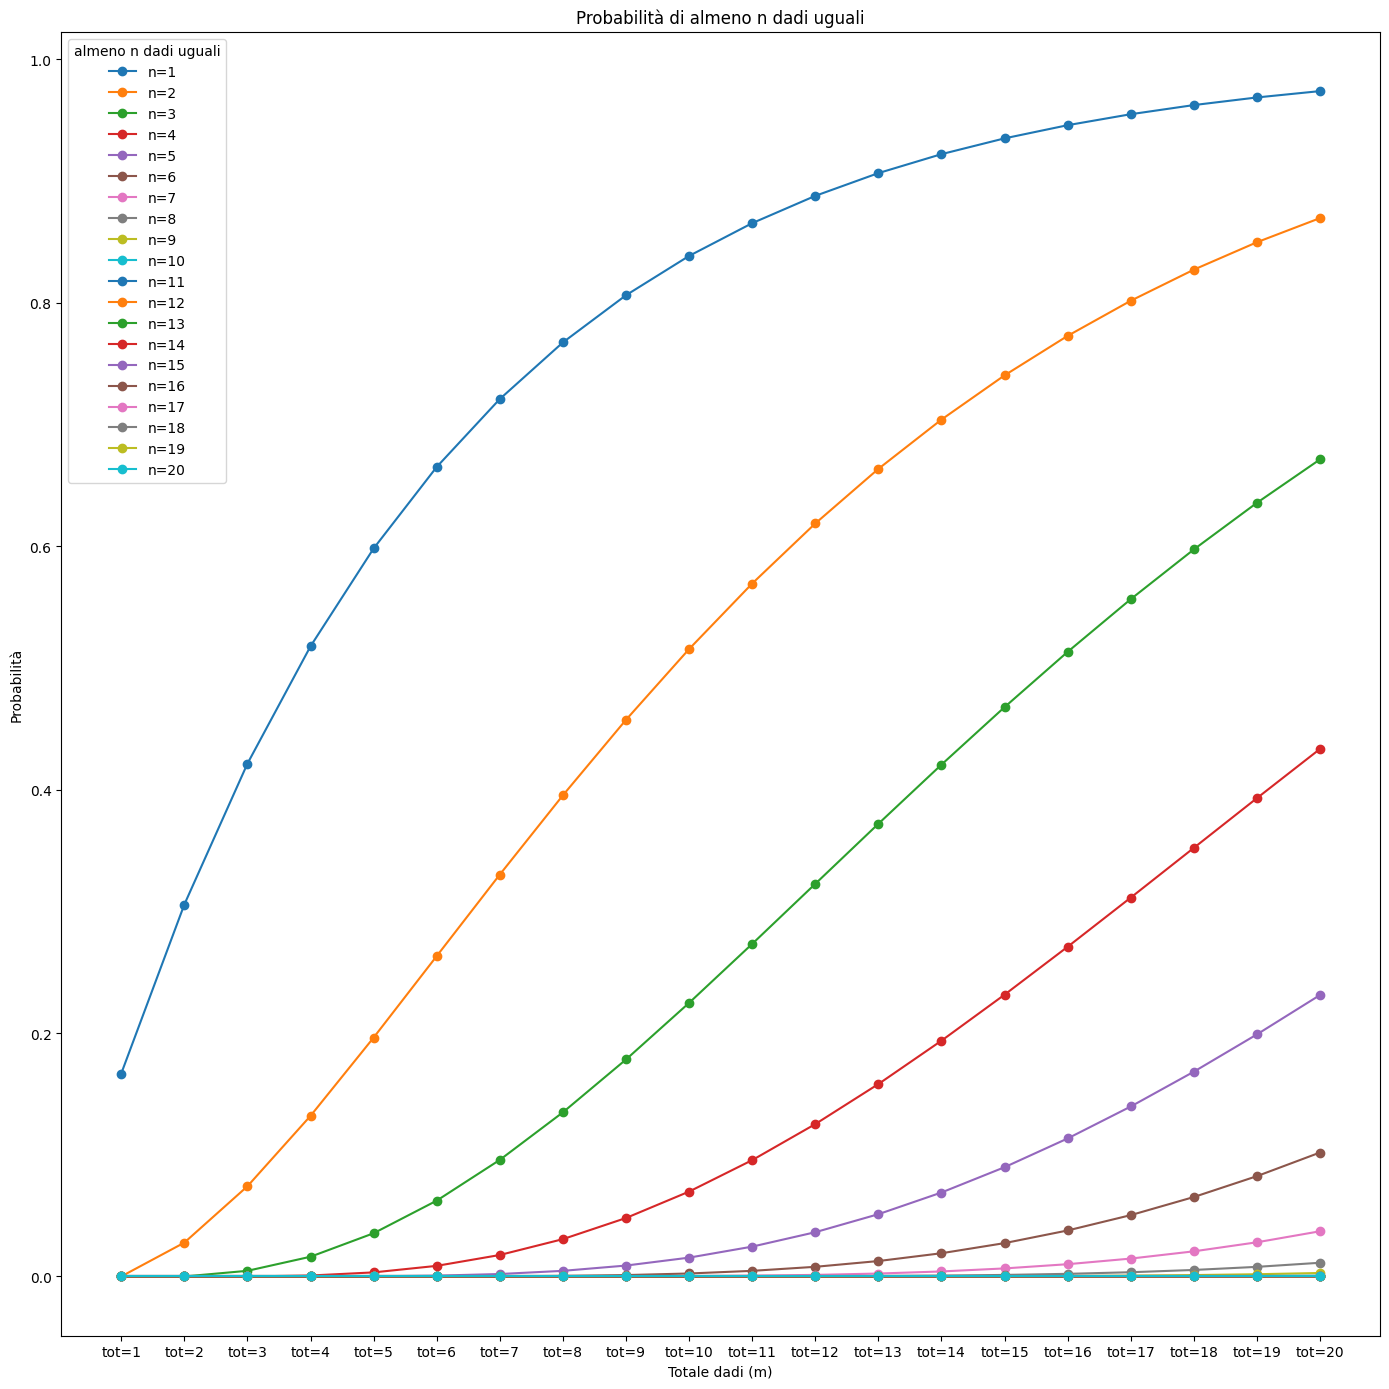

In [121]:
ax = df.plot(figsize=(14, 14), marker="o")

# Use numeric positions for ticks
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index)

plt.title("Probabilità di almeno n dadi uguali")
plt.xlabel("Totale dadi (m)")
plt.ylabel("Probabilità")
plt.legend(title="almeno n dadi uguali")

plt.tight_layout()
plt.show()